In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
from matplotlib import pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [4]:
market_basket_df = pd.read_csv('Market_Basket_Optimisation.csv', header=None)
market_basket_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
basket_items = []
for index, row in market_basket_df.iterrows():
    cleansed_items = [item for item in row if str(item)!='nan']
    basket_items.append(cleansed_items)
basket_items[:3]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney']]

In [6]:
#mengubah data string menjadi bahasa yg dimengerti sistem true/false
tran_encod = TransactionEncoder()
tran_encod_list = tran_encod.fit(basket_items).transform(basket_items)
transaction_df = pd.DataFrame(tran_encod_list, columns=tran_encod.columns_)
transaction_df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [7]:
#membuat data frame untuk masing2 item frekuensi
item_count = {}
for col in transaction_df.columns:
    item_count[col] = transaction_df[col].sum()
item_freq_df = pd.DataFrame(data=list(item_count.values()), index=list(item_count.keys()), columns=['frequency']).sort_values(by='frequency', ascending=False)
item_freq_df.shape, item_freq_df.head(10)

((120, 1),
                    frequency
 mineral water           1788
 eggs                    1348
 spaghetti               1306
 french fries            1282
 chocolate               1229
 green tea                991
 milk                     972
 ground beef              737
 frozen vegetables        715
 pancakes                 713)

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000')])

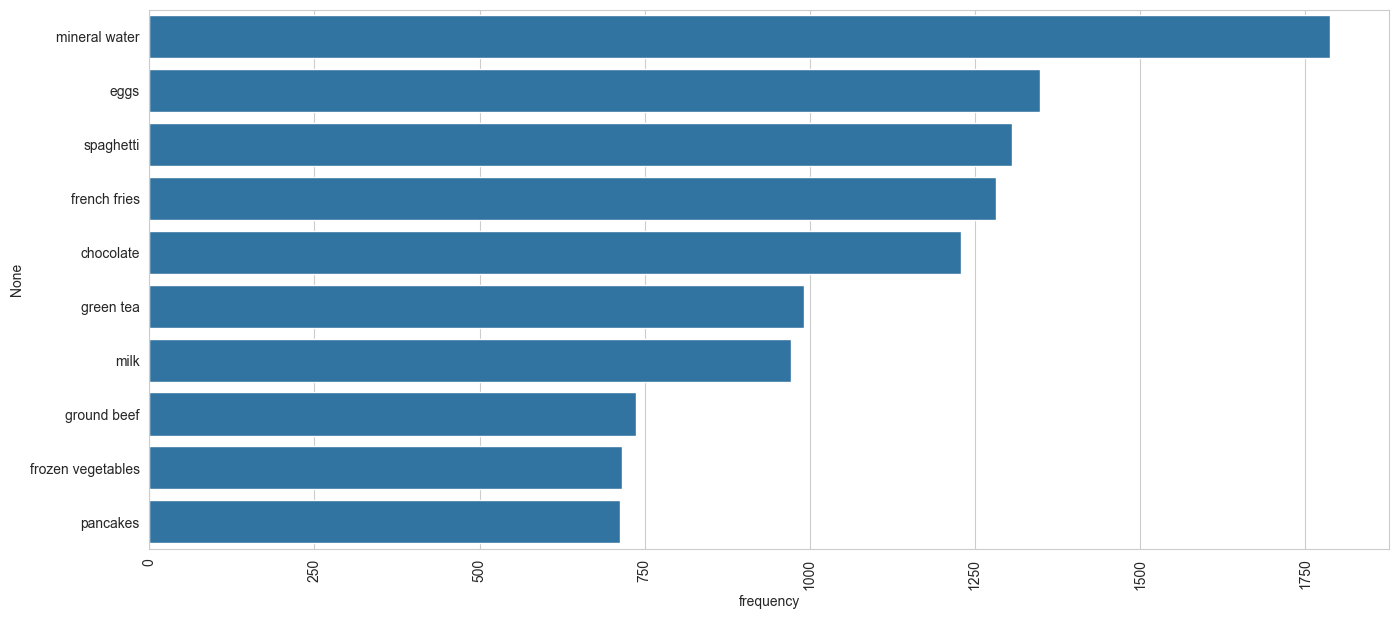

In [8]:
#visualisasi data
plt.figure(figsize=(16,7))
sns.barplot(y=item_freq_df.index[:10], x=item_freq_df.frequency[:10])
plt.xticks(rotation=90)

In [9]:
apriori(transaction_df, min_support=0.1, use_colnames=True)

,support,itemsets
0,0.163845,(chocolate)
1,0.179709,(eggs)
2,0.170911,(french fries)
3,0.132116,(green tea)
4,0.129583,(milk)
5,0.238368,(mineral water)
6,0.174110,(spaghetti)


In [10]:
#menentukan nilai min support realistis
print(f'freq>200: {item_freq_df[item_freq_df.frequency>200].shape[0]} items')
print(f'freq>100: {item_freq_df[item_freq_df.frequency>100].shape[0]} items')
print(f'freq>50: {item_freq_df[item_freq_df.frequency>50].shape[0]} items')

pd.set_option('display.max_rows', 15)
freq_itemset_support = apriori(transaction_df, min_support=0.03, use_colnames=True)
freq_itemset_support 

freq>200: 41 items
freq>100: 66 items
freq>50: 92 items


,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
...,...,...
49,0.039195,"(ground beef, spaghetti)"
50,0.047994,"(mineral water, milk)"
51,0.035462,"(milk, spaghetti)"
52,0.033729,"(mineral water, pancakes)"


In [11]:
#menentukan nilai confidence 20%
overal_association_rules = association_rules(freq_itemset_support, metric="confidence", min_threshold=0.2)
overal_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,1.0,0.003751,1.028711,0.135143,0.106959,0.027910,0.193661
1,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,1.0,0.006393,1.046827,0.224169,0.114514,0.044732,0.205587
2,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,1.0,0.006393,1.049383,0.222275,0.114514,0.047059,0.205587
3,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,1.0,0.010898,1.111823,0.389677,0.122959,0.100577,0.222018
4,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,1.0,0.013604,1.073256,0.339197,0.150648,0.068256,0.271158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,(milk),(spaghetti),0.129583,0.174110,0.035462,0.273663,1.571779,1.0,0.012900,1.137061,0.417935,0.132207,0.120540,0.238669
23,(spaghetti),(milk),0.174110,0.129583,0.035462,0.203675,1.571779,1.0,0.012900,1.093043,0.440468,0.132207,0.085123,0.238669
24,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,1.0,0.011071,1.180529,0.362712,0.112544,0.152922,0.248169
25,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796


In [12]:
#menghilangkan mineral water
trans_wo_water_df = transaction_df.drop(columns=['mineral water'])
freq_itemset_wo_water_supp = apriori(trans_wo_water_df, min_support=0.02, use_colnames=True)
freq_itemset_wo_water_supp

wo_water_assoc_rules = association_rules(freq_itemset_wo_water_supp, metric="confidence", min_threshold=0.2)
wo_water_assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,1.0,0.013128,1.224818,0.499424,0.120941,0.183552,0.245256
1,(burgers),(french fries),0.087188,0.170911,0.021997,0.252294,1.476173,1.0,0.007096,1.108844,0.353384,0.093168,0.098160,0.190499
2,(burgers),(spaghetti),0.087188,0.174110,0.021464,0.246177,1.413918,1.0,0.006283,1.095602,0.320707,0.089494,0.087260,0.184727
3,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,1.0,0.003751,1.028711,0.135143,0.106959,0.027910,0.193661
4,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,1.0,0.006393,1.046827,0.224169,0.114514,0.044732,0.205587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,(spaghetti),(milk),0.174110,0.129583,0.035462,0.203675,1.571779,1.0,0.012900,1.093043,0.440468,0.132207,0.085123,0.238669
28,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,1.0,0.011464,1.267048,0.535186,0.105651,0.210764,0.239939
29,(pancakes),(spaghetti),0.095054,0.174110,0.025197,0.265077,1.522468,1.0,0.008647,1.123778,0.379218,0.103279,0.110144,0.204897
30,(shrimp),(spaghetti),0.071457,0.174110,0.021197,0.296642,1.703760,1.0,0.008756,1.174209,0.444850,0.094474,0.148363,0.209194


In [13]:
#mengurutkan nilai confidence dan lift agar mudah dibaca
wo_water_assoc_rules.sort_values('confidence', ascending=False)
wo_water_assoc_rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
25,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,1.0,0.022088,1.163716,0.682343,0.168096,0.140684,0.312015
24,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,1.0,0.022088,1.373997,0.624943,0.168096,0.272197,0.312015
28,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,1.0,0.011464,1.267048,0.535186,0.105651,0.210764,0.239939
20,(frozen vegetables),(milk),0.095321,0.129583,0.023597,0.247552,1.910382,1.0,0.011245,1.156781,0.526755,0.117219,0.135532,0.214826
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,1.0,0.013128,1.224818,0.499424,0.120941,0.183552,0.245256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,(eggs),(french fries),0.179709,0.170911,0.036395,0.202522,1.184961,1.0,0.005681,1.039640,0.190286,0.115825,0.038128,0.207735
16,(eggs),(spaghetti),0.179709,0.174110,0.036528,0.203264,1.167446,1.0,0.005239,1.036592,0.174852,0.115126,0.035300,0.206533
17,(spaghetti),(eggs),0.174110,0.179709,0.036528,0.209801,1.167446,1.0,0.005239,1.038081,0.173666,0.115126,0.036684,0.206533
22,(green tea),(spaghetti),0.132116,0.174110,0.026530,0.200807,1.153335,1.0,0.003527,1.033405,0.153188,0.094852,0.032325,0.176590
